In [85]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [86]:
from scipy.stats.stats import pearsonr

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
import Experiment_Ready as exp


In [115]:

import os
import sys
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

In [116]:
from sklearn import metrics
import statsmodels
from math import sqrt
from math import log
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'02-14 13:41'

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [118]:
Product_Type_Options = [841810,841840,841850]

Product=Product_Type_Options[0] #841810
Exp_Country='CHN' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [119]:
MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]    

# For Single Combination of Month  and Feature

In [120]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)

dependent_variable_type='sqrt'

if dependent_variable_type=='same':
    dependent_variable=y
elif dependent_variable_type=='log':
    dependent_variable=y.apply(np.log)
elif dependent_variable_type=='sqrt':
    dependent_variable=y.apply(np.sqrt)

In [121]:
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,dependent_variable,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

(0, 0, 0.802)

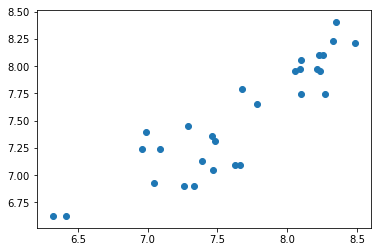

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Decison tree regressor model
dt = DecisionTreeRegressor()

# Decison tree regressor model train
DecisionTreeRegressor.fit(dt,X_train,y_train)

# Decison tree regressor model predict
y_predict_test = dt.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')


(0, 0, 0.94)

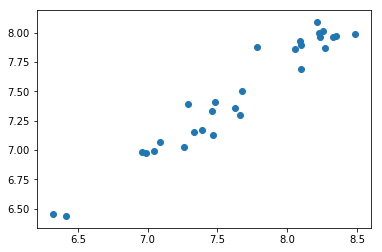

In [100]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [101]:
rfc.feature_importances_

array([0.1196543 , 0.0414344 , 0.09635205, 0.00758808, 0.02547233,
       0.01509708, 0.01361049, 0.0150741 , 0.01093029, 0.01289106,
       0.00973598, 0.01030321, 0.00950582, 0.06803866, 0.00577134,
       0.02973626, 0.01184209, 0.00860609, 0.01623516, 0.06508836,
       0.00961614, 0.00815668, 0.00639717, 0.09438979, 0.22311786,
       0.01129015, 0.0119249 , 0.04214015])

# For single combination calling Feature Selection Functions

Features scores:
1. important feature CPI_GBR-3 (original rank 24)
2. important feature CHN_USA_841850-3 (original rank 2)
3. important feature CPI_CHN-3 (original rank 23)
4. important feature BCI_CHN-3 (original rank 13)
5. important feature World-3 (original rank 27)
6. important feature CHN_GBR_841850-3 (original rank 0)
7. important feature CLI_GBR-3 (original rank 19)
8. important feature CHN_World_841850-3 (original rank 1)
9. important feature CLI_CHN-3 (original rank 15)
10. important feature CCI_GBR-3 (original rank 18)
11. important feature CHN_IDN_841850-3 (original rank 5)
12. important feature CHN_ITA_841850-3 (original rank 4)
13. important feature GDP_CHN-3 (original rank 16)
14. important feature AUT_GBR_841850-3 (original rank 7)
15. important feature GBP-3 (original rank 26)
16. important feature ITA_GBR_841850-3 (original rank 9)
17. important feature BCI_GBR-3 (original rank 17)
18. important feature CNY-3 (original rank 25)
19. important feature TUR_GBR_841850-3 (

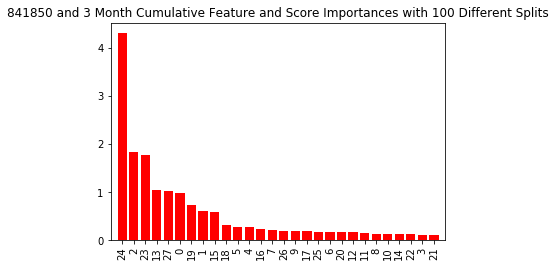

In [102]:
# Main for 3 Version for Train Test Split and Feature selection 
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
# Use both RF Importances and R2 Accuracy with different number of splits


number_of_split_for_feature=100
result=exp.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

print ("Features scores:") 

for f in range(n_feature):

    print("%d. important feature %s (original rank %d)" % (f+1, X_Column_Names[scored_feature_indices[f]], scored_feature_indices[f]))


# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and {} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split_for_feature))
plt.bar(range(n_feature), feature_score[scored_feature_indices],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_indices,rotation=90)
plt.xlim([-1, n_feature])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 12
#plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and {} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split_for_feature), format='png', dpi=300)

plt.show()

    
    

In [47]:
def prepare_ (Product,Exp_Country,Imp_Country,MonthSeries,scored_feature_indices):
    
    return Product,Exp_Country,Imp_Country,MonthSeries,scored_feature_indices
    


In [48]:
prepare_ (Product,Exp_Country,Imp_Country,MonthSeries,scored_feature_indices)
    

(841840,
 'CHN',
 'GBR',
 '3',
 array([23, 24, 27, 15,  2,  1,  7, 20, 13, 17, 16,  5, 10, 21,  8, 18,  4,
        26, 12,  0,  9, 22,  3, 14,  6, 19, 11, 25], dtype=int64))

In [49]:
# Calling function by single parameter set 
a=exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                   rand=50,is_random_fixed='TRUE',
                   est=200,min_leaf=5,feat=10,max_leaf=10,min_weight=0.0,min_impurity=1e-07)

randomforest rs= 50


In [50]:
# By using Ver 3 for Feature Selection results
# Percentile variable takes the most important variables according to its feature score and omits the others.
# ie.25 percentile takes %75 importance variables and omits %25 least important features
percent=25
percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

# Train Test Split after percentile selection

Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


In [51]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000,random_state=50)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')

(4, 5, 0.431)

In [52]:
exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=50)

randomforest rs= 50


((4, 5, 0.431), (1, 1, 0.942))

# For Combination of Month and Feature with Multiple Runs Start

month 1 percent 100 R2 value 0.624
month 1 percent 100 R2 value 0.609
month 1 percent 100 R2 value 0.606
month 1 percent 100 R2 value 0.616
month 1 percent 100 R2 value 0.601
month 1 percent 75 R2 value 0.633
month 1 percent 75 R2 value 0.617
month 1 percent 75 R2 value 0.612
month 1 percent 75 R2 value 0.631
month 1 percent 75 R2 value 0.618
month 1 percent 50 R2 value 0.627
month 1 percent 50 R2 value 0.617
month 1 percent 50 R2 value 0.618
month 1 percent 50 R2 value 0.613
month 1 percent 50 R2 value 0.631
month _12 percent 100 R2 value 0.637
month _12 percent 100 R2 value 0.641
month _12 percent 100 R2 value 0.643
month _12 percent 100 R2 value 0.63
month _12 percent 100 R2 value 0.651
month _12 percent 75 R2 value 0.649
month _12 percent 75 R2 value 0.646
month _12 percent 75 R2 value 0.625
month _12 percent 75 R2 value 0.652
month _12 percent 75 R2 value 0.65
month _12 percent 50 R2 value 0.659
month _12 percent 50 R2 value 0.649
month _12 percent 50 R2 value 0.643
month _12 perc

month 6 percent 100 R2 value 0.621
month 6 percent 75 R2 value 0.657
month 6 percent 75 R2 value 0.664
month 6 percent 75 R2 value 0.662
month 6 percent 75 R2 value 0.671
month 6 percent 75 R2 value 0.664
month 6 percent 50 R2 value 0.603
month 6 percent 50 R2 value 0.616
month 6 percent 50 R2 value 0.621
month 6 percent 50 R2 value 0.625
month 6 percent 50 R2 value 0.628
month _67 percent 100 R2 value 0.498
month _67 percent 100 R2 value 0.547
month _67 percent 100 R2 value 0.503
month _67 percent 100 R2 value 0.515
month _67 percent 100 R2 value 0.504
month _67 percent 75 R2 value 0.516
month _67 percent 75 R2 value 0.528
month _67 percent 75 R2 value 0.537
month _67 percent 75 R2 value 0.517
month _67 percent 75 R2 value 0.532
month _67 percent 50 R2 value 0.542
month _67 percent 50 R2 value 0.572
month _67 percent 50 R2 value 0.56
month _67 percent 50 R2 value 0.59
month _67 percent 50 R2 value 0.542
month _678 percent 100 R2 value 0.582
month _678 percent 100 R2 value 0.571
month 

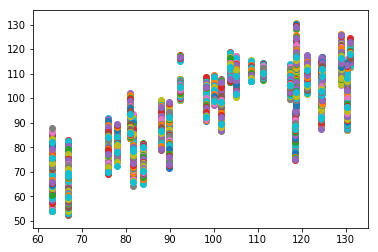

In [122]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#MonthSeries_option=["1","12"]
#MonthSeries_option=["1",'_12','_123','_1236','_1236_12',"2","3","6","12",'_12']
MonthSeries_option=["1",'_12','_123',"2",'_23','_234',"3",'_34','_345',"4",'_45','_456',"5",'_56','_567',"6",'_67','_678',
                    "12",'_1236','_123456','_1236_12',]

results_level1 = pd.DataFrame()
results_level2 = pd.DataFrame()
feature_results_level1 = pd.DataFrame()
Percent_option=[100,75,50]

number_of_split=5
 

random_state_options=np.random.randint(1,100,size=number_of_split)


    
for month in MonthSeries_option:

#    MonthSeries=month

    Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
    y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
    Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

    X = Data_Core1.parse('X{}'.format(month), header=0,index_col=None, na_values=['NA'])
    X.drop(['Date','Year','Month'], axis=1, inplace=True)
    X_Column_Names=list(X.columns.values)
    n_feature=X.shape[1]

    #Get Feature Importance
    number_of_split_for_feature=100
    feature_result=exp.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
    scored_feature_indices=feature_result[0]
    feature_score=feature_result[1]
    
    # Record feature importances
    feature_results_level1[str(month)]=feature_result
    
    # Implement Feature Importance to each month variance    
    for percent in Percent_option:
    
        percentile=100-percent
        threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
        X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
    
        R2result=[]
        for turn in range(number_of_split):
            random=random_state_options[turn]
            
            Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=random)

            X_train = Scaled_Train_Test_Split[0]
            X_test = Scaled_Train_Test_Split[1]
            y_train = Scaled_Train_Test_Split[2]
            y_test = Scaled_Train_Test_Split[3]
            scaler_X = Scaled_Train_Test_Split[4]  
            scaler_y = Scaled_Train_Test_Split[5]
            scaled_value_X=Scaled_Train_Test_Split[6]
            scaled_value_y=Scaled_Train_Test_Split[7]

            # Random Foest Regressor model
            rfc=RandomForestRegressor(n_estimators=300)

            # Random Foest Regressor model train
            RandomForestRegressor.fit(rfc,X_train,y_train)

            # Random Foest Regressor mode predict
            y_predict_test = rfc.predict(X_test)

            # Compare predicted Y and real Y 
            R2=exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')[2]
            print ('month',month,'percent',percent,'R2 value',R2)
            R2result.append(R2)
        
        results_level1[str(percent)]=R2result
        results_level1['month']=month
    
    results_level2=pd.concat([results_level2,results_level1])

results_level2.set_index(['month'],inplace=True)



In [123]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')

# Read from Excel Tuning paremeters

#abc = pd.ExcelFile('FeatureSelection.xlsx')
#abcd = abc.parse('{}_{}_{}'.format(841810,Exp_Country,Imp_Country), header=0,index_col=None, na_values=['NA'])


# Write to Excel this and previous Tuning paremeters
writer = pd.ExcelWriter('FeatureSelection_{}_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product,dependent_variable_type))
results_level2.to_excel(writer,'Results')
feature_results_level1.to_excel(writer,'Importances')

writer.save()

# For Combination of Month and Feature with Multiple Runs End

In [ ]:
#Read feature importances from Feature Selection excels

feature_results_from_excel = pd.ExcelFile('FeatureSelection_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
feature_results = feature_results_from_excel.parse('Importances', header=0,index_col=None, na_values=['NA'])
scored_feature_indices=feature_results[str(month)][0]
feature_score=feature_results[str(month)][1]

In [ ]:
results_level2.loc['1'].boxplot()

In [ ]:
feature_results_level1['1'][0]

In [ ]:
feature_results_level1['1'][1]

In [ ]:
results_level2.loc['12'].boxplot()


In [ ]:
results = DataFrame()
results_exp = DataFrame()

results_exp[str(slv)] =
results=pd.concat([results,results_exp])


In [ ]:
# 1 Version for Feature selection
# Internetten bulunan kod blogu
# Random Forest'a gore Feature Importance Hesaplama
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

ScalerType = Scalertype=Scaler_Type_Options[0]
n_sample=len(X)

rfc=RandomForestRegressor(n_estimators=3000)
RandomForestRegressor.fit(rfc,scaled_value_X,scaled_value_y)


predictions = rfc.predict(X_test)
print('MAE',int(metrics.mean_absolute_error(y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(y_test, predictions)))/1000
     )


importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[indices[f]], indices[f], importances[indices[f]],std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations".format(Product,MonthSeries))
plt.bar(range(n_feature), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n_feature), indices,rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations.png".format(Product,MonthSeries), format='png', dpi=300)

plt.show()

In [ ]:
#  2 Version for Feature selection 
# Internetten bulunan kod blogu http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature Importance Hesaplama
# Burada asıl özellik bir veri seti yaratılıyor make_regression ile. Ve oaradakilere dogru çalışıp çalışmadığı test ediliyor.
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

from sklearn.datasets import make_regression


n_sample=len(X)

number_of_split=100
number_of_row=29

random_state_options = np.arange(0,number_of_split)
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))
j=0


# For different split sets Random Forest Regressor runs.

for random_state_i in random_state_options:

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    

    rfc=RandomForestRegressor(n_estimators=30)
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict[:,j] = rfc.predict(X_test)
    
    result=exp.inverse_scale_and_graph_Y_predict_and_test (y_predict[:,j],y_test,scaler_y,'NO')
    
    importances = rfc.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

    indices = np.argsort(importances)[::-1]
    feature_indices[:,j]=indices
    feature_importances[:,j]=importances
    j=j+1
    

print ("Features scores:")    
for i in range(n_feature):
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]
        importances_coeff=feature_importances[i,j]
        
        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)
        
#        print('feat=',i,'#ofsplit=',j,'tot_indice',feature_indices_score[i],
#              'indice=',indice_coeff,'tot_importan=',feature_importances_score[i],'importan',importances_coeff )

    print( i,X_Column_Names[i])#,feature_indices_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_indices_score)
scored_feature_importances = np.argsort(feature_importances_score)
    
 
    
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_importances_score[scored_feature_importances][::-1],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_importances[::-1],rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()